Imports

In [1]:
import os
import warnings

# Set the environment variable to suppress KMeans warnings
os.environ['OMP_NUM_THREADS'] = '1'

# Suppress all warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Pipeline

In [2]:
def clustering_pipeline(filepath):
    # Load the dataset
    data = pd.read_csv(filepath)
    
    # Perform preprocessing steps like encoding categorical variables and scaling
    label_encoder = LabelEncoder()
    data['Gender'] = label_encoder.fit_transform(data['Gender'])
    
    features = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Determine the optimal number of clusters using the elbow method
    wcss = []
    for i in range(1, 11):  # testing for 1 to 10 clusters
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(scaled_features)
        wcss.append(kmeans.inertia_)
    
    # Plotting the elbow graph
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')  # Within-cluster sums of squares
    plt.grid()
    plt.show()

    # User input for the number of clusters after viewing the elbow graph
    user_k = int(input("Enter the optimal number of clusters (K) based on the Elbow Graph: "))


    # Fit the KMeans model with the user-defined number of clusters
    kmeans = KMeans(n_clusters=user_k, random_state=42)
    kmeans.fit(scaled_features)
    
    # Predict clusters and add to the original data
    data['Cluster'] = kmeans.predict(scaled_features)
    
    return data, scaler, label_encoder, kmeans, user_k

Visualize Clusters

In [3]:
def visualize_clusters(data):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set2', s=100)
    plt.title('Clusters Visualization')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend(title='Cluster')
    plt.grid()
    plt.show()

Prediction

In [4]:
def predict_cluster(kmeans, scaler, label_encoder, gender, age, income, spending_score):
    # Prepare the new customer data
    new_customer = pd.DataFrame({
        'Gender': [gender],
        'Age': [age],
        'Annual Income (k$)': [income],
        'Spending Score (1-100)': [spending_score]
    })

    # Encode the gender and scale the features
    new_customer['Gender'] = label_encoder.transform(new_customer['Gender'])
    scaled_new_customer = scaler.transform(new_customer)

    # Predict the cluster for the new customer
    return kmeans.predict(scaled_new_customer)[0]

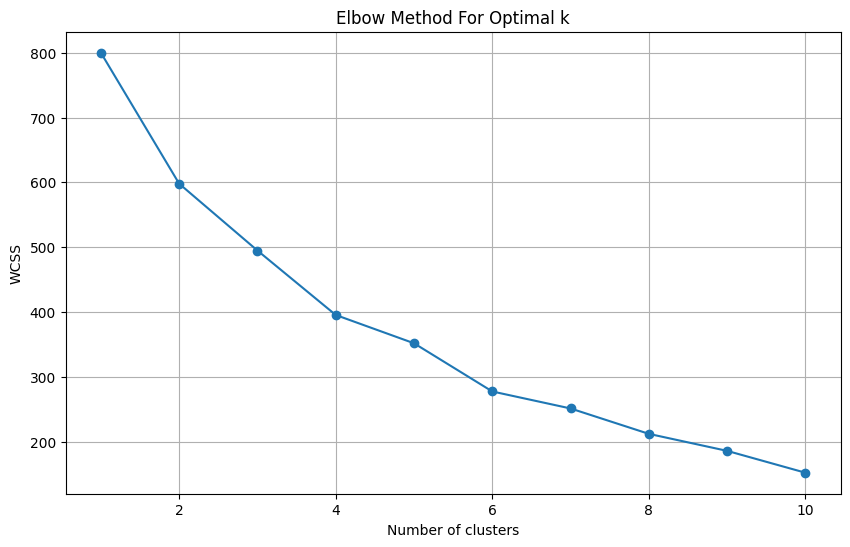

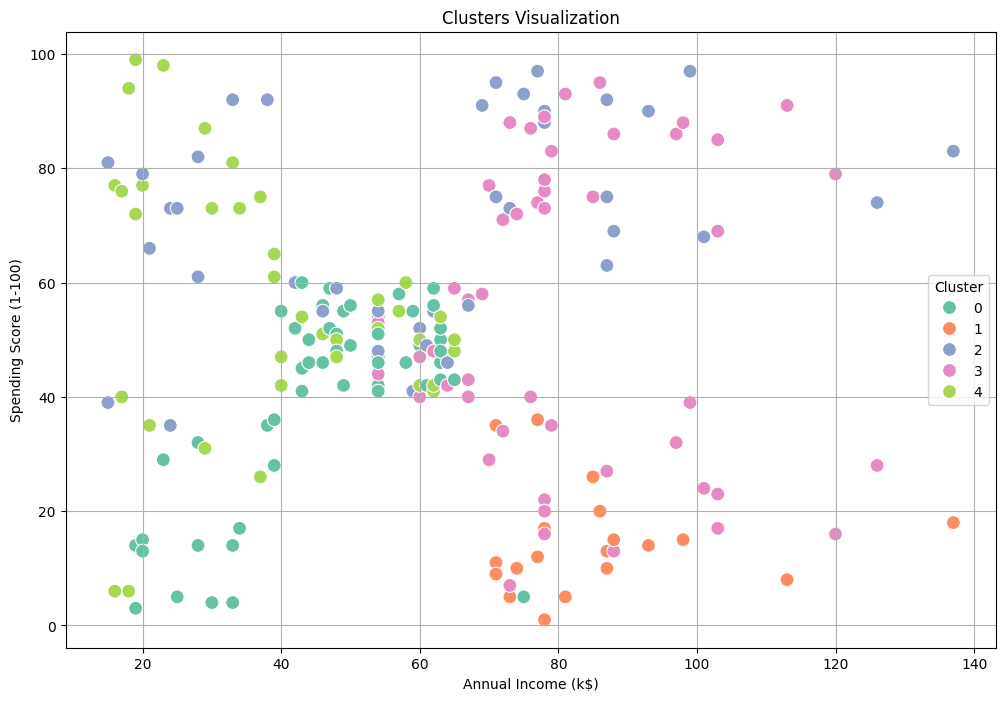

The new customer belongs to cluster: 2
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   Cluster  
0        2  
1        2  
2        4  
3        4  
4        4  


In [5]:
if __name__ == "__main__":
    # Provide the filepath to your dataset
    filepath = "Data/Mall_Customers.csv"
    
    # Run the full clustering pipeline
    clustered_data, scaler, label_encoder, kmeans, user_k = clustering_pipeline(filepath)
    
    # Visualize the clusters
    visualize_clusters(clustered_data)

    
    #NEW Prediction data
    # Example prediction for a new customer
    new_customer_cluster = predict_cluster(kmeans, scaler, label_encoder, 'Male', 30, 65, 50)
    print(f"The new customer belongs to cluster: {new_customer_cluster}")

    # Display the clustered data
    print(clustered_data.head())